# Measuring Distance

## Point to Point distance

In spatial analysis, we often want to know the shortest distance between two features. For example, we may want to know the distance from residence to pharmacy store to see if the distance affects people's health. Or, we may be interested in whether the distance to airport or highway affects population growth. In this example, we will measure the nearest distance to airport in Pennsylvania, USA.

As usual, we need to import libraries we will be using.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

Then, we load the example data and airport data and explore the data by plotting them together.

In [2]:
df = pd.read_csv('../data/example.csv')

In [3]:
from gps2space import geodf
gdf = geodf.df_to_gdf(df, x='longitude', y='latitude')
gdf.head()

,pid,timestamp,latitude,longitude,geometry
0,P2,2020-04-27 10:42:22.162176000,40.993799,-76.669419,POINT (-76.66942 40.99380)
1,P2,2020-06-02 01:12:45.308505600,39.946904,-78.926234,POINT (-78.92623 39.94690)
2,P2,2020-05-08 23:47:33.718185600,41.237403,-79.252317,POINT (-79.25232 41.23740)
3,P2,2020-04-26 14:31:12.100310400,41.991390,-77.467769,POINT (-77.46777 41.99139)
4,P2,2020-03-31 15:53:27.777897600,41.492674,-76.542921,POINT (-76.54292 41.49267)


In [4]:
airport = gpd.read_file('../data/paairport.shp')
airport.head()

,STATE,NAME,geometry
0,Pennsylvania,Erie International,POINT (-80.17600 42.08208)
1,Pennsylvania,Bradford Regional,POINT (-78.63987 41.80313)
2,Pennsylvania,Venango Regional,POINT (-79.86014 41.37793)
3,Pennsylvania,Wilkes-Barre/Scranton International,POINT (-75.72390 41.33823)
4,Pennsylvania,Williamsport Regional,POINT (-76.92144 41.24205)


In [5]:
pacounty = gpd.read_file('../data/pacounty.shp')

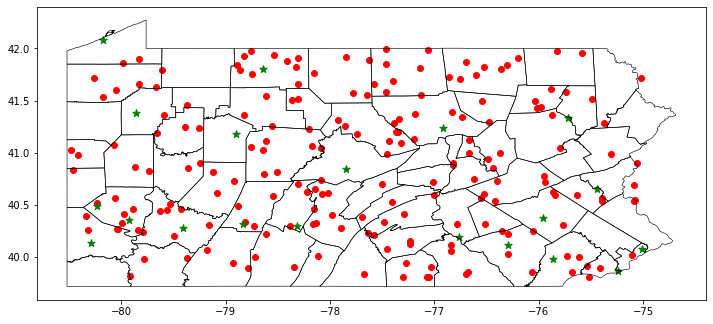

In [6]:
ax = pacounty.boundary.plot(figsize=(12, 12), edgecolor='black', linewidth=0.6)
gdf.plot(ax=ax, color='r')
airport.plot(ax=ax, color='g', marker='*', markersize=60)

plt.show();

The red dots are the footprints of Person 1 (P1) and Person 2 (P2) while the green stars are the airports in Pennsylvania, USA.

We can calculate the distance from each point of P1 and P2 to the nearest airport using the `dist_to_point` function in the `dist` module. The `dist_to_point` function takes three parameters:

- gdf_a: This is the GeoDataFrame of P1 and P2's footprints
- gdf_b: This is the landmark from where you want to measure the distance
- proj: This is the EPSG identifier you want to use to project your spatial data and will be applied to gdf_a and gdf_b

Because the airport data come from other source, we do not know if it has been projected or what is the projection system. So we want to check the projection system for airport data.

In [7]:
airport.crs

It returns nothing, which means this data do not have projection. We will give it an initial projection of **EPSG:4326**.

In [8]:
airport.crs = ("epsg:4326")

Now, we can import the `dist` function to calculate the distance from each point of P1 and P2 to the nearest airport.

In [9]:
from gps2space import dist

In [10]:
dist_to_airport = dist.dist_to_point(gdf, airport, proj=2163)

In [11]:
dist_to_airport.head()

,pid,timestamp,latitude,longitude,geometry,STATE,NAME,dist2point
0,P2,2020-04-27 10:42:22.162176000,40.993799,-76.669419,POINT (1926745.083 -169042.499),Pennsylvania,Williamsport Regional,34579.711173
1,P2,2020-06-02 01:12:45.308505600,39.946904,-78.926234,POINT (1774126.223 -333525.438),Pennsylvania,Johnstown-Cambria County,42187.331826
2,P2,2020-05-08 23:47:33.718185600,41.237403,-79.252317,POINT (1712951.727 -200231.269),Pennsylvania,Du Bois-Jefferson County,30051.080354
3,P2,2020-04-26 14:31:12.100310400,41.991390,-77.467769,POINT (1833671.313 -79623.054),Pennsylvania,Williamsport Regional,94804.346362
4,P2,2020-03-31 15:53:27.777897600,41.492674,-76.542921,POINT (1921659.985 -112174.444),Pennsylvania,Williamsport Regional,42388.435141


The `dist2point` column represents the distance from each point to the nearest airport measured in meters. Likewise, you can then save the GeoDataFrame to a spatial dataset or non-spatial dataset as we did in the last section.

## Point to Polygon distance

In this example, we want to calculate the nearest distance to parks represented in polygons using `dist_to_poly` function. The `dist_to_poly` function incorporates R-tree and spatial indexing technologies to boost the nearest neighbor query. The `dist_to_poly` function takes four parameters:

- gdf_source: This is the source GeoPandas dataframe
- gdf_target: This is the target GeoPandas dataframe
- proj: This is the EPSG identifier you want to use to project your spatial data and will be applied to gdf_source and gdf_target
- search_radius: This is the search radius in meters with a default value of None

Please note that:

1. If `search_radius` is specified, points with no neighbors within the search radius, then the `dist_to_poly` function returns a `NaN` value
2. If `search_radius` is not specified, the `dist_to_poly` function employs brute-force search to find the nearest distance, and it may take longer time to calculate the nearest distance, especially for data in larger volumes

As usual, we read the park data as a GeoPandas dataframe. Then we illustrate how `dist_to_poly` works using two examples: an example specifying the `search_radius` and another example without specifying the `search_radius`

In [12]:
park = gpd.read_file('../data/papark.shp')
park.head()

,park_id,park_name,park_acres,geometry
0,1,11th Avenue Playground,1.48,"POLYGON ((-79.89948 40.40552, -79.89946 40.406..."
1,22,Alpine Parklet,0.12,"POLYGON ((-80.01282 40.45765, -80.01303 40.457..."
2,6117,Negley Park,18.46,"POLYGON ((-76.89575 40.25092, -76.89178 40.249..."
3,8202,Deer Lake Community Park,32.76,"MULTIPOLYGON (((-76.05700 40.62615, -76.05696 ..."
4,8215,Delano Playground,1.37,"POLYGON ((-75.97098 40.80281, -75.97062 40.801..."


### Specifying `search_radius`

In [13]:
%%time
dist_with_search_radius = dist.dist_to_poly(gdf, park, proj=2163, search_radius=10000)

A search_radius of 10000 meters is specified. Points with no neighbors intersected with thte search radius will return NaN.
Wall time: 4.57 s


In [14]:
dist_with_search_radius

,pid,timestamp,latitude,longitude,geometry,dist2poly
0,P2,2020-04-27 10:42:22.162176000,40.993799,-76.669419,POINT (1926745.083 -169042.499),3143.431951
1,P2,2020-06-02 01:12:45.308505600,39.946904,-78.926234,POINT (1774126.223 -333525.438),4007.426442
2,P2,2020-05-08 23:47:33.718185600,41.237403,-79.252317,POINT (1712951.727 -200231.269),7198.553223
3,P2,2020-04-26 14:31:12.100310400,41.991390,-77.467769,POINT (1833671.313 -79623.054),4418.972172
4,P2,2020-03-31 15:53:27.777897600,41.492674,-76.542921,POINT (1921659.985 -112174.444),4997.223163
...,...,...,...,...,...,...
195,P1,2020-04-14 22:59:47.187801600,40.592932,-77.002548,POINT (1912029.573 -220204.526),2789.935358
196,P1,2020-02-18 16:00:05.505350400,40.263436,-80.322911,POINT (1651469.678 -328218.968),3433.440261
197,P1,2020-02-24 10:22:29.605353600,40.726640,-76.403706,POINT (1956064.504 -191577.975),6104.559787
198,P1,2020-01-13 10:02:15.962697600,40.279678,-77.898978,POINT (1848682.909 -274721.379),2696.384797


### Without specifying `search_radius`

In [15]:
%%time
dist_no_search_radius = dist.dist_to_poly(gdf, park, proj=2163)

No search_radius is specified, the calculation may take longer time for datasets in large volumes.
Wall time: 17.3 s


In [16]:
dist_no_search_radius

,pid,timestamp,latitude,longitude,geometry,dist2poly
0,P2,2020-04-27 10:42:22.162176000,40.993799,-76.669419,POINT (1926745.083 -169042.499),3143.431951
1,P2,2020-06-02 01:12:45.308505600,39.946904,-78.926234,POINT (1774126.223 -333525.438),4007.426442
2,P2,2020-05-08 23:47:33.718185600,41.237403,-79.252317,POINT (1712951.727 -200231.269),7198.553223
3,P2,2020-04-26 14:31:12.100310400,41.991390,-77.467769,POINT (1833671.313 -79623.054),4418.972172
4,P2,2020-03-31 15:53:27.777897600,41.492674,-76.542921,POINT (1921659.985 -112174.444),4997.223163
...,...,...,...,...,...,...
195,P1,2020-04-14 22:59:47.187801600,40.592932,-77.002548,POINT (1912029.573 -220204.526),2789.935358
196,P1,2020-02-18 16:00:05.505350400,40.263436,-80.322911,POINT (1651469.678 -328218.968),3433.440261
197,P1,2020-02-24 10:22:29.605353600,40.726640,-76.403706,POINT (1956064.504 -191577.975),6104.559787
198,P1,2020-01-13 10:02:15.962697600,40.279678,-77.898978,POINT (1848682.909 -274721.379),2696.384797


In [18]:
dist_no_search_radius[dist_no_search_radius['dist2poly'] == 'NaN']

,pid,timestamp,latitude,longitude,geometry,dist2poly


In [23]:
dist_with_search_radius.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,200.0,40.878765,0.649778,39.807771,40.321969,40.821446,41.468584,41.991390
longitude,200.0,-77.732011,1.465171,-80.485216,-78.824666,-77.635756,-76.549980,-75.025528
dist2poly,185.0,3919.033243,2802.089284,0.000000,1550.077077,3623.525457,5316.719387,13855.516463


In [20]:
dist_no_search_radius.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,200.0,40.878765,0.649778,39.807771,40.321969,40.821446,41.468584,41.991390
longitude,200.0,-77.732011,1.465171,-80.485216,-78.824666,-77.635756,-76.549980,-75.025528
dist2poly,200.0,4726.981887,4027.497246,0.000000,1849.390860,3877.189734,5970.677707,21244.390382


The above results show that specifying a search radius decreases the time needed for the nearest distance calculation, and most of the points have neighbors within the search radius, the final results are similar.